In [ ]:
import matplotlib.pyplot as plt
import matplotlib

r1 = 11
g1 = 6
b1 = 8
summ = r1+g1+b1

def fact(n):
    if n == 0: return 1
    else:
        a = 1;
        for i in range(1,n+1): a *= i;
        return a

def C_nk(n, k):
    return(fact(n)/(fact(k)*fact(n-k)))

def bernulli(n,k,item, summ):
    return(C_nk(n,k) * (item/summ)**k * ((summ-item)/summ)**(n-k))

# 1.1
Рассматривается извлечение шаров с возвращением из первой корзины (см. исходные данные к ДЗ No1: R1, G1, B1). Выполняется серия из n экспериментов, подсчитывается число k извлечений красных шаров.
Построить графики вероятности P(k). Графики строятся для числа опытов n = 6, 9 и 12 c расчётом вероятностей по формуле
Бернулли.

Формула Бернулли:
P(k) = C_nk * p^k * q^(n-k)

k = [0,...,n]


In [ ]:
N = [6,9,12]
K = []
for i in range(3):
    a = [0]
    for j in range(N[i]): a.append(a[-1]+1)
    K.append(a)

print(N)
print(K)

[6, 9, 12]
[[0, 1, 2, 3, 4, 5, 6], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]]


n =  6 

k	P(k)
______________________________
0 	 0.030840979456000017
1 	 0.14539318886400007
2 	 0.2855937638400001
3 	 0.29919346688000004
4 	 0.17631043584000003
5 	 0.055411851264
6 	 0.007256313856

______________________________________________________________

n =  9 

k	P(k)
______________________________
0 	 0.005416169448144901
1 	 0.03830005538331036
2 	 0.12037160263326113
3 	 0.22068127149431205
4 	 0.2600886414040106
5 	 0.20435536110315117
6 	 0.1070432843873649
7 	 0.03604518759982695
8 	 0.0070803047071088645
9 	 0.000618121839509504

______________________________________________________________

n =  12 

k	P(k)
______________________________
0 	 0.0009511660138054152
1 	 0.008968136701593915
2 	 0.03875516217474512
3 	 0.10150161521957053
4 	 0.17944035547745507
5 	 0.22558216117165775
6 	 0.20678364774068628
7 	 0.13926245664168665
8 	 0.06838781352939968
9 	 0.023881458692806237
10 	 0.005629200977590042
11 	 0.0008041715682271487
12 	 5.265409077677759e-05

___

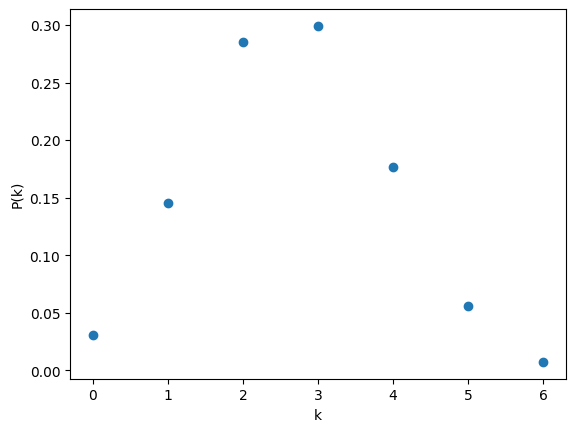

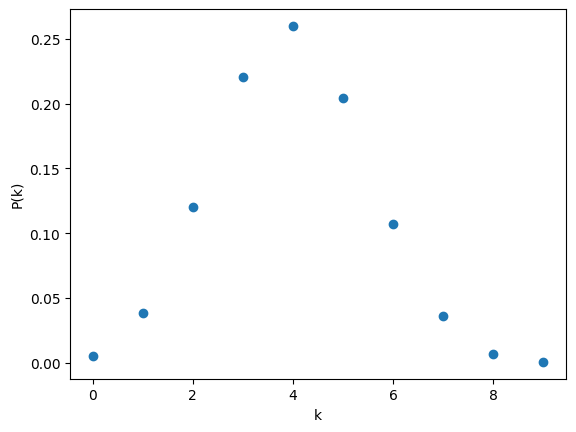

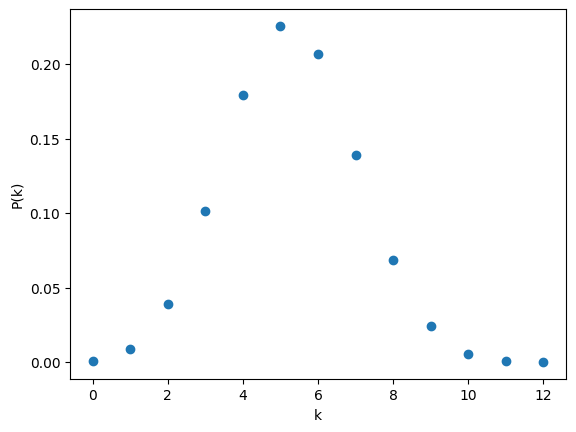

In [ ]:
P_k = []

for i in range(3):
    n = N[i]
    k_ = K[i]

    p_k = []
    for k in k_:
        p_k.append(bernulli(n,k,r1,summ))
    P_k.append(p_k)

    fig = plt.figure()
    ax = fig.add_subplot()
    plt.scatter(k_, p_k)
    ax.set_xlabel('k')
    ax.set_ylabel("P(k)")

    print("n = ", n, '\n')
    print("k\tP(k)\n______________________________")
    for i in range(n+1):
        print(k_[i], '\t', p_k[i])

    # print("n = ", n)
    # print("k = ", k_)
    # print("P(k) = ", p_k)

    print("\n______________________________________________________________\n")



#1.2
Для n = 12 также строится график функции распределения F(k).

In [ ]:
diapazons = []
a = [0.5,1.5]
diapazons.append(a)
for i in range(11):
    b = [diapazons[-1][0]+1, diapazons[-1][1]+1]
    diapazons.append(b)


p_k_ = P_k[2]

In [ ]:
F_k = [0]*13
F_k[0] = p_k_[0]

for i in range(1,12):
    F_k[i] = F_k[i-1]+p_k_[i]
F_k[12] = 1

print("k\tF(k)\n______________________________")
for i in range(12+1):
    print(K[2][i], '\t', F_k[i])

k	F(k)
______________________________
0 	 0.0009511660138054152
1 	 0.00991930271539933
2 	 0.048674464890144445
3 	 0.15017608010971498
4 	 0.32961643558717
5 	 0.5551985967588278
6 	 0.761982244499514
7 	 0.9012447011412007
8 	 0.9696325146706004
9 	 0.9935139733634066
10 	 0.9991431743409966
11 	 0.9999473459092237
12 	 1


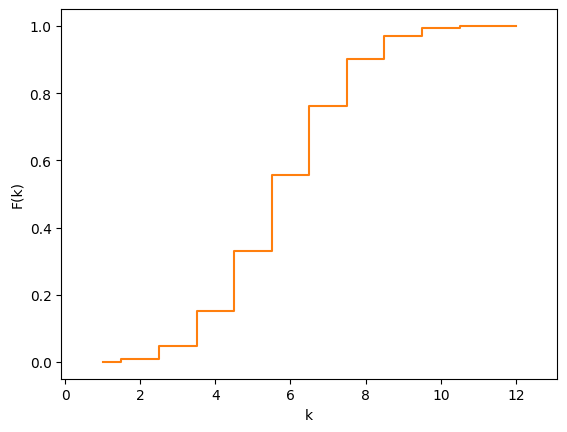

In [ ]:
fig = plt.figure()
ax = fig.add_subplot()
ax.set_xlabel('k')
ax.set_ylabel("F(k)")
plt.step(0.5, 0, where = 'pre')
plt.step(K[2][1:], F_k[:12], where = 'mid')
plt.step(12.5, 1, where = 'post')



#1.3
Для n = 25, 50, 100, 200, 400, 1000 строится огибающая графика P(k), при этом для каждого графика рассчитываются не менее 7 точек с использованием локальной теоремы Муавра - Лапласа.

P_n(k) = fi(x)/sqrt(n*p*q), где
x = (k-n*p)/sqrt(n*p*q)
fi(x) = 1/sqrt(2*pi) * e^(-x^2/2)

In [ ]:
from math import pi, sqrt, e, ceil

In [ ]:
def fi(x):
    return((1/sqrt(2*pi)) * e**((-x**2)/2))
def loc_muavr_laplas(n,k,item, summ):
    x = (k-n*(item/summ))/sqrt(n*(item/summ)*((summ-item)/summ))
    return(fi(x)/sqrt(n*(item/summ)*((summ-item)/summ)))


n = 25

n =  25 

k	P(k)
______________________________
4 	 0.0030117027898852824
6 	 0.02112712115240788
8 	 0.0774210630873139
10 	 0.14820693784512612
12 	 0.14820693784512612
14 	 0.0774210630873139
16 	 0.02112712115240788
18 	 0.0030117027898852824
20 	 0.00022427171077696578


Text(0, 0.5, 'P(k)')

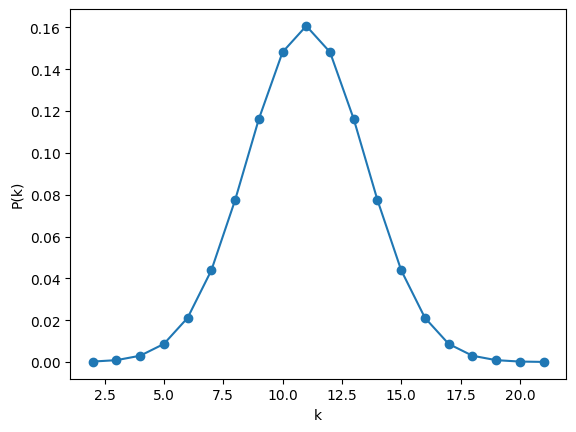

In [ ]:
n = 25
p_k = []

q = 20

k_ = [2]*q
for i in range(1,q):
    k_[i] = k_[i-1] + 1

for k in k_:
    p_k.append(loc_muavr_laplas(n, k, r1, summ))

print("n = ", n, '\n')
print("k\tP(k)\n______________________________")
for i in range(2,20,2):
        print(k_[i], '\t', p_k[i])

fig = plt.figure()
ax = fig.add_subplot()
plt.scatter(k_, p_k)
plt.plot(k_, p_k)
ax.set_xlabel('k')
ax.set_ylabel("P(k)")

n = 50

n =  50 

k	P(k)
______________________________
10 	 0.0003292456739888585
13 	 0.004245531866544706
16 	 0.026368386345678813
19 	 0.07888136591136759
22 	 0.11365923062167448
25 	 0.07888136591136759
28 	 0.026368386345678813
31 	 0.004245531866544706
34 	 0.0003292456739888585


Text(0, 0.5, 'P(k)')

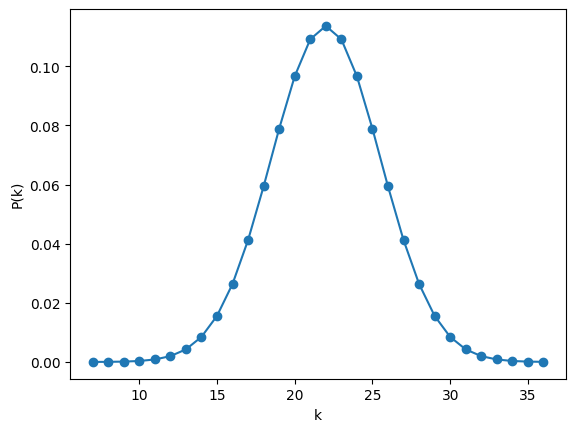

In [ ]:
n = 50
p_k = []

q = 30

k_ = [7]*q
for i in range(1,q):
    k_[i] = k_[i-1] + 1

for k in k_:
    p_k.append(loc_muavr_laplas(n, k, r1, summ))

print("n = ", n, '\n')
print("k\tP(k)\n______________________________")
for i in range(3,30,3):
        print(k_[i], '\t', p_k[i])

fig = plt.figure()
ax = fig.add_subplot()
plt.scatter(k_, p_k)
plt.plot(k_, p_k)
ax.set_xlabel('k')
ax.set_ylabel("P(k)")

n = 100

n =  100 

k	P(k)
______________________________
27 	 0.00022813519265699737
32 	 0.004325610361040874
37 	 0.029734648875376093
42 	 0.07410346892256306
47 	 0.06695369803032847
52 	 0.021931629795388277
57 	 0.002604519120638605
62 	 0.00011213585538848289


Text(0, 0.5, 'P(k)')

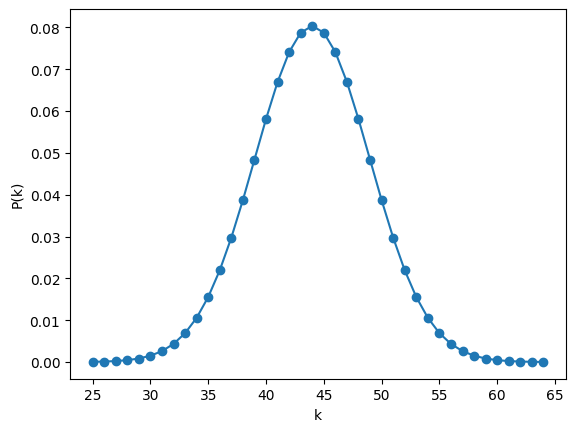

In [ ]:
n = 100
p_k = []

q = 40

k_ = [25]*q
for i in range(1,q):
    k_[i] = k_[i-1] + 1

for k in k_:
    p_k.append(loc_muavr_laplas(n, k, r1, summ))

print("n = ", n, '\n')
print("k\tP(k)\n______________________________")
for i in range(2,40,5):
        print(k_[i], '\t', p_k[i])

fig = plt.figure()
ax = fig.add_subplot()
plt.scatter(k_, p_k)
plt.plot(k_, p_k)
ax.set_xlabel('k')
ax.set_ylabel("P(k)")

n = 200

n =  200 

k	P(k)
______________________________
63 	 0.0001001328625936376
70 	 0.002122765933272353
77 	 0.016649480499962985
84 	 0.0483139299493911
91 	 0.051870106994257176
98 	 0.02060321633869557
105 	 0.0030277917552971865
112 	 0.00016462283699442926


Text(0, 0.5, 'P(k)')

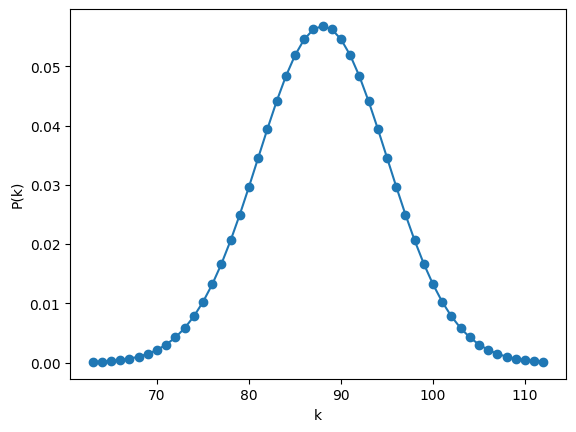

In [ ]:
n = 200
p_k = []

q = 50

k_ = [63]*q
for i in range(1,q):
    k_[i] = k_[i-1] + 1

for k in k_:
    p_k.append(loc_muavr_laplas(n, k, r1, summ))

print("n = ", n, '\n')
print("k\tP(k)\n______________________________")
for i in range(0,50,7):
        print(k_[i], '\t', p_k[i])

fig = plt.figure()
ax = fig.add_subplot()
plt.scatter(k_, p_k)
plt.plot(k_, p_k)
ax.set_xlabel('k')
ax.set_ylabel("P(k)")

n = 400

n =  400 

k	P(k)
______________________________
147 	 0.0005638580788313297
155 	 0.004289920008779533
163 	 0.017049795621759106
171 	 0.03539808409919923
179 	 0.03839113326417705
187 	 0.02175067323024948
195 	 0.006437319602200811
203 	 0.0009952404882985833


Text(0, 0.5, 'P(k)')

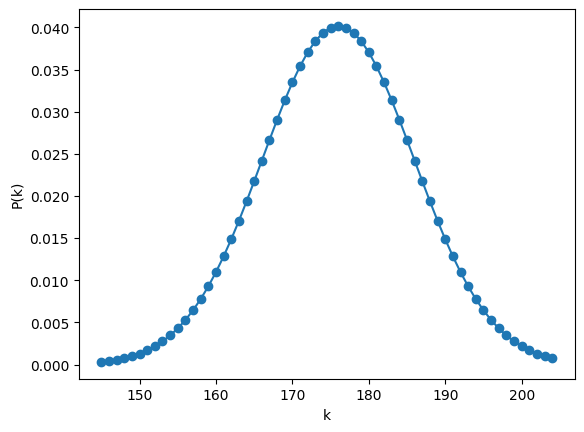

In [ ]:
n = 400
p_k = []

q = 60
k_ = [145]*q
for i in range(1,q):
    k_[i] = k_[i-1] + 1

for k in k_:
    p_k.append(loc_muavr_laplas(n, k, r1, summ))

print("n = ", n, '\n')
print("k\tP(k)\n______________________________")
for i in range(2,60,8):
        print(k_[i], '\t', p_k[i])

fig = plt.figure()
ax = fig.add_subplot()
plt.scatter(k_, p_k)
plt.plot(k_, p_k)
ax.set_xlabel('k')
ax.set_ylabel("P(k)")

n = 1000

n =  1000 

k	P(k)
______________________________
355 	 1.091053742016481e-08
380 	 1.7079844835304535e-05
405 	 0.002116033139795184
430 	 0.020747309010498923
455 	 0.016099109415018933
480 	 0.0009886502827636632
505 	 4.804899453062894e-06


Text(0, 0.5, 'P(k)')

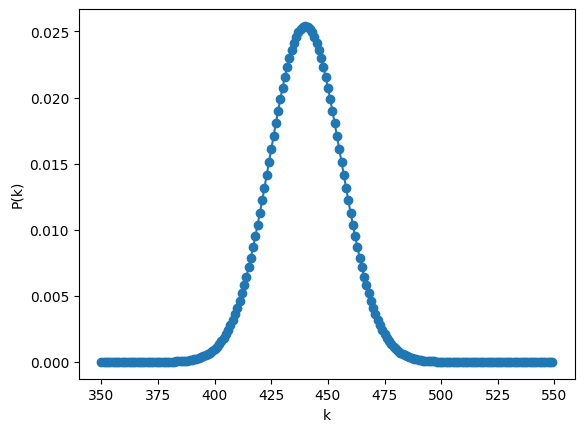

In [ ]:
n =1000
p_k = []

q = 200
k_ = [350]*q
for i in range(1,q):
    k_[i] = k_[i-1] + 1

for k in k_:
    p_k.append(loc_muavr_laplas(n, k, r1, summ))

print("n = ", n, '\n')
print("k\tP(k)\n______________________________")
for i in range(5,180,25):
        print(k_[i], '\t', p_k[i])

fig = plt.figure()
ax = fig.add_subplot()
plt.scatter(k_, p_k)
plt.plot(k_, p_k)
ax.set_xlabel('k')
ax.set_ylabel("P(k)")

#1.4
Построить график вероятности того, что абсолютное число извлечений красных шаров отклонится от математического ожидания не более, чем на R1 (11). При построении графика использовать n = 25, 50, 100, 200, 400.

P_n(|m-np|<= E) ~~ 2 Ф(E/sqrt(npq))

In [ ]:
N = [25,50,100,200,400]
x_for_f = []
for n in N:
    x_for_f.append(r1/sqrt(n*(r1/summ)*((summ-r1)/summ)))

print(x_for_f)

[4.432026302139591, 3.1339158526400435, 2.2160131510697956, 1.5669579263200217, 1.1080065755348978]


In [ ]:
f_x = [0.499997, 0.49905, 0.4864, 0.4406, 0.3643]
p_n = []
for i in range(5):
    p_n.append(2*f_x[i])

n	Ф(x)		P(n)
______________________________
25 	 0.499997 	 0.999994
50 	 0.49905 	 0.9981
100 	 0.4864 	 0.9728
200 	 0.4406 	 0.8812
400 	 0.3643 	 0.7286


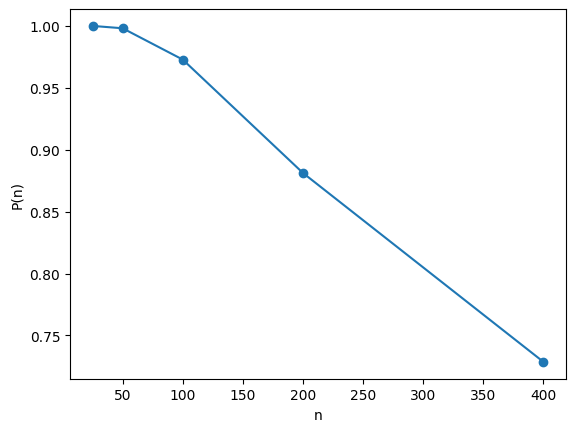

In [ ]:
fig = plt.figure()
ax = fig.add_subplot()
plt.scatter(N, p_n)
plt.plot(N, p_n)
ax.set_xlabel('n')
ax.set_ylabel("P(n)")

print("n\tФ(x)\t\tP(n)\n______________________________")
for i in range(5):
    print(N[i],'\t', f_x[i], '\t', p_n[i])

#1.5
Построить график вероятности того, что относительное число извлечений красных шаров при n = 1000 отклонится от математического ожидания не более, чем на eps. При построении графика использовать eps = 1e-1, 1e-2, 1e-3.

P_n = (|m/n - p| <= E) ~~ 2 * Ф ((E*sqrt(n))/sqrt(p*q))

In [ ]:
n = 1000
eps = [0.1, 0.01, 0.001]

In [ ]:
x_for_f = []
for epss in eps:
    x_for_f.append( (epss*sqrt(n)) /  sqrt((r1/summ)*((summ-r1)/summ)))


print(x_for_f)

[6.37058989297032, 0.637058989297032, 0.06370589892970319]


In [ ]:
f_x = [0.499997, 0.2357, 0.0239]
p_n = []
for i in range(3):
    p_n.append(2*f_x[i])

n	Ф(x)		P(n)
______________________________
0.1 	 0.499997 	 0.999994
0.01 	 0.2357 	 0.4714
0.001 	 0.0239 	 0.0478


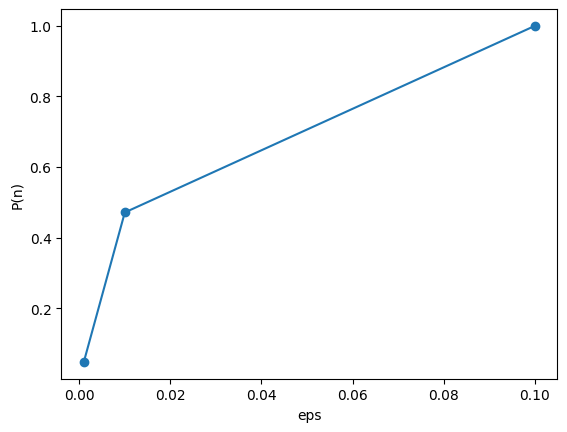

In [ ]:
fig = plt.figure()
ax = fig.add_subplot()
plt.scatter(eps, p_n)
plt.plot(eps, p_n)
ax.set_xlabel('eps')
ax.set_ylabel("P(n)")

print("n\tФ(x)\t\tP(n)\n______________________________")
for i in range(3):
    print(eps[i],'\t', f_x[i], '\t', p_n[i])

#1.6
Рассчитать допустимый интервал числа успешных испытаний k (симметричный относительно
математического ожидания), обеспечивающий попадание в него с вероятностью P = 0,7; 0,8; 0,9; 0,95; 0,99.
n = 1000

P_n(k) = ~~ 2 * Ф(E/sqrt(npq))

Разделив P(k) на два, получаем конечное значение Ф(x), пользуясь таблицей Лапласа получаем значение х.

M(k) = np

k = x * sqrt(npq)

In [ ]:
n = 1000
P = [0.7, 0.8, 0.9, 0.95, 0.99]
m_k = n * r1 / summ

x = [15.04, 1.29, 1.65, 1.96, 2.58]


In [ ]:
k = []
for xx in x:
    k.append(xx*sqrt(n*(r1/summ)*((summ-r1)/summ)) )
print(k)

[236.08488778403415, 20.24930221019974, 25.90027026886013, 30.76638165270658, 40.49860442039948]


In [ ]:
print("n\tP(k)\t Ф(x)\t    x\t\t  M(k)\t\tk\t\t\t\tИнтервал\n___________________________________________________________________________________________________________________________")

for i in range(5):
    print(n, '\t', P[i], '\t', P[i]/2, '\t', x[i], '\t', m_k, '\t', k[i], '\t[',  m_k-k[i], ';',  m_k+k[i], ']')

n	P(k)	 Ф(x)	    x		  M(k)		k				Интервал
___________________________________________________________________________________________________________________________
1000 	 0.7 	 0.35 	 15.04 	 440.0 	 236.08488778403415 	[ 203.91511221596585 ; 676.0848877840342 ]
1000 	 0.8 	 0.4 	 1.29 	 440.0 	 20.24930221019974 	[ 419.75069778980026 ; 460.24930221019974 ]
1000 	 0.9 	 0.45 	 1.65 	 440.0 	 25.90027026886013 	[ 414.09972973113986 ; 465.90027026886014 ]
1000 	 0.95 	 0.475 	 1.96 	 440.0 	 30.76638165270658 	[ 409.23361834729343 ; 470.76638165270657 ]
1000 	 0.99 	 0.495 	 2.58 	 440.0 	 40.49860442039948 	[ 399.5013955796005 ; 480.4986044203995 ]


#1.7
Построить график зависимости минимально необходимого числа испытаний n, для того чтобы обеспечить вероятность появления не менее, чем N1=R1+G1+B1 красных шаров с вероятностями P = 0,7; 0,8; 0,9; 0,95; 0,99.

P_n(N1 <= m <= n) = Ф(x2) - Ф(x1), где

x2 = (n - np)/sqrt(npq)

x1 = (N1 - np)/sqrt(npq)

n >= N1 = 25

x2 >= (25-25*p)/sqrt(25*p*q) = 6



Ф(x2) ~ 0.5



In [ ]:
P = [0.7, 0.8, 0.9, 0.95, 0.99]

x1 = []
x2 = []

fi_x2 = 0.5

p = r1/summ
q = (summ-r1)/summ


In [ ]:
fi_x1 = []
for i in P:
    fi_x1.append(fi_x2-i)

print(fi_x1)

[-0.19999999999999996, -0.30000000000000004, -0.4, -0.44999999999999996, -0.49]


In [ ]:
x1_in_fi = [-0.5, -0.84, -1.28, -1.64, -2.33] #значения х1

(25-np)/sqrt(npq) = x1_in_fi

n = (2pN1+x1^2pq+p*sqrt(4N1q+x1^4q^2))/(2p^2)

n = (2pN1+x1^2pq-p*sqrt(4N1*q+x1^4q^2))/(2p^2)

In [ ]:
def minN(p, n, N1, q):
    print((N1-n*p)/(sqrt(n*p*q)),  "\t", n)



In [ ]:
N1 = summ
for n in range(50, 100):
    minN(p, n, N1, q)

0.8547043234472846 	 50
0.7221618225773817 	 51
0.5922619570546686 	 52
0.4648908464815875 	 53
0.33994170906254684 	 54
0.21731429260625357 	 55
0.09691436075713815 	 56
-0.02134677179835403 	 57
-0.13755266059940746 	 58
-0.2517821139115295 	 59
-0.3641095406272092 	 60
-0.4746052672236046 	 61
-0.5833358269940917 	 62
-0.6903642243895953 	 63
-0.7957501769750631 	 64
-0.8995503372189962 	 65
-1.0018184960834193 	 66
-1.1026057701627545 	 67
-1.2019607739284357 	 68
-1.299929778468 	 69
-1.396556857959573 	 70
-1.491884024992493 	 71
-1.5859513557299614 	 72
-1.6787971058079976 	 73
-1.7704578177750765 	 74
-1.8609684207969415 	 75
-1.9503623232802374 	 76
-2.038671499005371 	 77
-2.1259265673027774 	 78
-2.2121568677564563 	 79
-2.2973905298736756 	 80
-2.381654538119457 	 81
-2.4649747926783654 	 82
-2.547376166273609 	 83
-2.6288825573443204 	 84
-2.709516939855589 	 85
-2.789301409992071 	 86
-2.868257229964629 	 87
-2.9464048691401117 	 88
-3.0237640426867998 	 89
-3.10035374791

Text(0, 0.5, 'n')

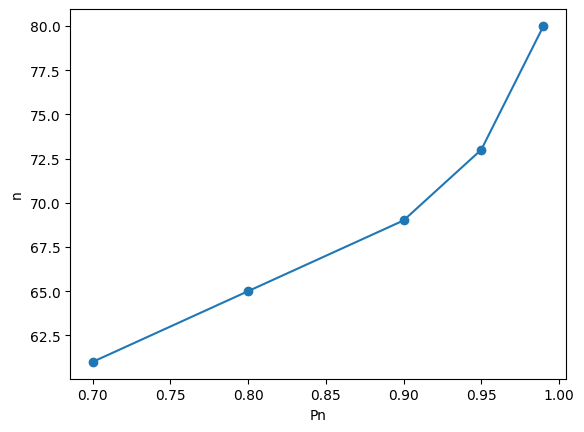

In [ ]:
n_p = [61,65,69,73,80]

fig = plt.figure()
ax = fig.add_subplot()
plt.plot(P, n_p, marker='o')
ax.set_xlabel('Pn')
ax.set_ylabel("n")



---



#2.1
Рассматривается извлечение шаров без возвращения из второй корзины (см. исходные данные к ДЗ No1: R2, G2, B2). Выполняется серия из n=G2+B2 экспериментов, подсчитывается число k извлечений красных шаров.

Рассчитать значения P(k) и построить график.


P(k) = C(из R2 по k) * C(из g2+b2 по n-k) / C(из R2+G2+B2 по n)

In [ ]:
r2 = 10
g2 = 5
b2 = 10

summ = r2+g2+b2

In [ ]:
P_k = []
K_ = []
n = g2+b2

for k in range(13):
    K_.append(k)
    P_k.append(C_nk(g2+b2,n-k) * C_nk(r2,k)/ C_nk(r2+g2+b2,n))

In [ ]:
print("k\tP(k)\n______________________________")
for i in range(13):
    print(i, '\t', round(P_k[i], ndigits=9))


k	P(k)
______________________________
0 	 3.06e-07
1 	 4.5889e-05
2 	 0.001445502
3 	 0.016703582
4 	 0.087693804
5 	 0.231511644
6 	 0.321543949
7 	 0.236236371
8 	 0.088588639
9 	 0.015311617
10 	 0.000918697
11 	 3.7963e-05
12 	 1.055e-06


Text(0, 0.5, 'P(k)')

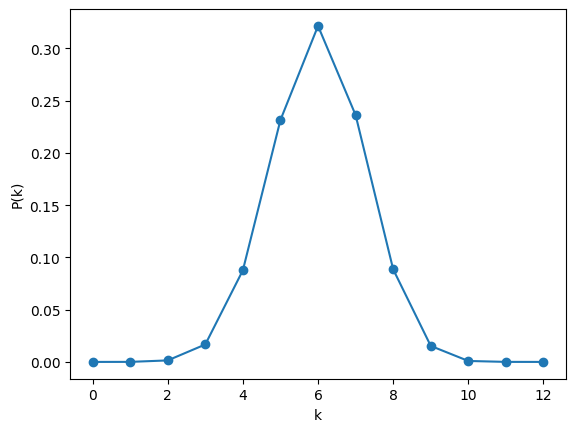

In [ ]:
fig = plt.figure()
ax = fig.add_subplot()
plt.plot(K_, P_k, marker='o')
ax.set_xlabel('k')
ax.set_ylabel("P(k)")

#2.2
Построить график функции распределения F(k)

In [ ]:
print("k\tP(k)\n______________________________")
for i in range(13):
    print(i, '\t', round(P_k[i], ndigits=9))


k	P(k)
______________________________
0 	 3.06e-07
1 	 4.5889e-05
2 	 0.001445502
3 	 0.016703582
4 	 0.087693804
5 	 0.231511644
6 	 0.321543949
7 	 0.236236371
8 	 0.088588639
9 	 0.015311617
10 	 0.000918697
11 	 3.7963e-05
12 	 1.055e-06


In [ ]:
F_k = [0]*13
F_k[0] = P_k[0]

for i in range(1,12):
    F_k[i] = F_k[i-1]+P_k[i]
F_k[12] = 1

print("k\tF(k)\n______________________________")
for i in range(12+1):
    print(i, '\t', round(F_k[i], ndigits=6))

k	F(k)
______________________________
0 	 0.0
1 	 4.6e-05
2 	 0.001492
3 	 0.018195
4 	 0.105889
5 	 0.337401
6 	 0.658945
7 	 0.895181
8 	 0.98377
9 	 0.999081
10 	 1.0
11 	 1.000038
12 	 1


In [ ]:
diapazons = []
a = [0.5,1.5]
diapazons.append(a)
for i in range(11):
    b = [diapazons[-1][0]+1, diapazons[-1][1]+1]
    diapazons.append(b)


p_k_ = P_k[2]

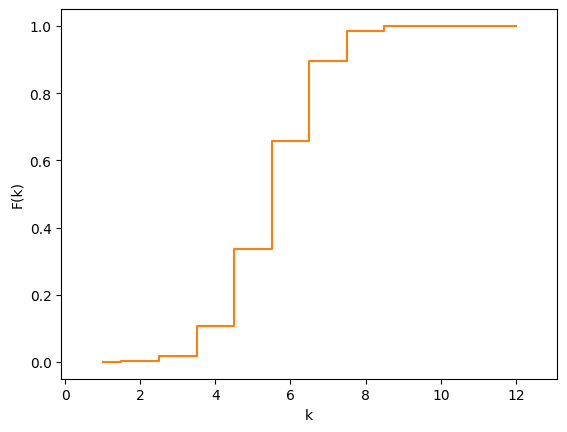

In [ ]:
K = [0, 1, 2 , 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

fig = plt.figure()
ax = fig.add_subplot()
ax.set_xlabel('k')
ax.set_ylabel("F(k)")
plt.step(0.5, 0, where = 'pre')
plt.step(K[1:], F_k[1:], where = 'mid')
plt.step(12.5, 1, where = 'post')

#2.3

Рассчитать математическое ожидание числа извлечённых красных шаров k.

M(x) = x1*p1 + ... + xn*pn

In [ ]:
Mx = 0

print("k\t\tP(k)\t\t\t.    k*P(k)")
print("__________________________________________________________")

for i in range(13):
    Mx += P_k[i] * K[i]
    print(K[i],'\t', P_k[i],'\t\t', K[i]*P_k[i])

print("\nM(x) = ", Mx)

k		P(k)			.    k*P(k)
__________________________________________________________
0 	 3.0592640634368994e-07 		 0.0
1 	 4.58889609515535e-05 		 4.58889609515535e-05
2 	 0.0014455022699739351 		 0.0028910045399478702
3 	 0.01670358178636547 		 0.05011074535909642
4 	 0.08769380437841873 		 0.3507752175136749
5 	 0.23151164355902545 		 1.1575582177951274
6 	 0.32154394938753533 		 1.9292636963252119
7 	 0.2362363709785974 		 1.6536545968501817
8 	 0.08858863911697402 		 0.7087091129357922
9 	 0.015311616637501682 		 0.13780454973751513
10 	 0.000918696998250101 		 0.009186969982501009
11 	 3.796268587810334e-05 		 0.00041758954465913675
12 	 1.0545190521695373e-06 		 1.2654228626034448e-05

M(x) =  6.000430243773285


#2.4

Рассчитать дисперсию числа извлечённых красных шаров k.

D(X) = M(X^2)- M(X)^2

M(X)^2 = k^2*P(k)

In [ ]:
Dx = 0
Mx2 = 0

print("k\t\tP(k)\t\t\tk*P(k)\t\t\tk^2 * P(k)")
print("_________________________________________________________________________________")

for i in range(13):
    Mx2 += P_k[i] * K[i]**2
    print(K[i],'\t', P_k[i],'\t', K[i]*P_k[i],'\t\t', K[i]**2*P_k[i])

Dx = Mx2 - Mx**2

print("\nD(X) = ", Dx)

k		P(k)			k*P(k)			k^2 * P(k)
_________________________________________________________________________________
0 	 3.0592640634368994e-07 	 0.0 		 0.0
1 	 4.58889609515535e-05 	 4.58889609515535e-05 		 4.58889609515535e-05
2 	 0.0014455022699739351 	 0.0028910045399478702 		 0.0057820090798957405
3 	 0.01670358178636547 	 0.05011074535909642 		 0.15033223607728924
4 	 0.08769380437841873 	 0.3507752175136749 		 1.4031008700546996
5 	 0.23151164355902545 	 1.1575582177951274 		 5.787791088975636
6 	 0.32154394938753533 	 1.9292636963252119 		 11.575582177951272
7 	 0.2362363709785974 	 1.6536545968501817 		 11.575582177951272
8 	 0.08858863911697402 	 0.7087091129357922 		 5.669672903486338
9 	 0.015311616637501682 	 0.13780454973751513 		 1.2402409476376361
10 	 0.000918696998250101 	 0.009186969982501009 		 0.0918696998250101
11 	 3.796268587810334e-05 	 0.00041758954465913675 		 0.0045934849912505045
12 	 1.0545190521695373e-06 	 1.2654228626034448e-05 		 0.00015185074351241337

D(X

#3.1

Рассматривается извлечение шаров без возвращения из третьей корзины (см. исходные данные к ДЗ No1: R3, G3, B3). Выполняется серия из k экспериментов, которая прекращается, когда извлечены все R3 красных шаров.

Рассчитать значения P(k) и построить график.


P(k) = C(R3-1, k-1)/C(R3, summ)

In [ ]:
r3 = 8
g3 = 5
b3 = 6

summ = r3 + g3 + b3

In [ ]:

P_k = []
K = []

for k in range(8,20):
    K.append(k)
    P_k.append(C_nk(k-1, r3)/C_nk(summ, r3))

In [ ]:
print("k\tP(k)\n______________________________")
for i in range(12):
    print(i+8, '\t', round(P_k[i], ndigits=9))


k	P(k)
______________________________
8 	 1.654e-06
9 	 1.3231e-05
10 	 0.000119076
11 	 0.00059538
12 	 0.002183059
13 	 0.006549178
14 	 0.017027864
15 	 0.039731682
16 	 0.085139319
17 	 0.170278638
18 	 0.321637427
19 	 0.578947368


Text(0, 0.5, 'P(k)')

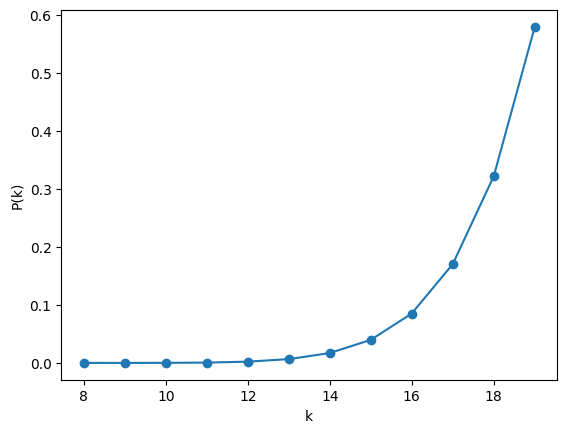

In [ ]:
fig = plt.figure()
ax = fig.add_subplot()
plt.plot(K, P_k, marker='o')
ax.set_xlabel('k')
ax.set_ylabel("P(k)")

#3.2
Построить график функции F(k)

In [ ]:
print("k\tP(k)\n______________________________")
for i in range(12):
    print(i+8, '\t', round(P_k[i], ndigits=9))


k	P(k)
______________________________
8 	 1.654e-06
9 	 1.3231e-05
10 	 0.000119076
11 	 0.00059538
12 	 0.002183059
13 	 0.006549178
14 	 0.017027864
15 	 0.039731682
16 	 0.085139319
17 	 0.170278638
18 	 0.321637427
19 	 0.578947368


In [ ]:
F_k = [0]*12
F_k[0] = P_k[0]

for i in range(1,11):
    F_k[i] = F_k[i-1]+P_k[i]
F_k[11] = 1

print("k\tF(k)\n______________________________")
for i in range(11+1):
    print(i+8, '\t', round(F_k[i], ndigits=6))

k	F(k)
______________________________
8 	 2e-06
9 	 1.5e-05
10 	 0.000134
11 	 0.000729
12 	 0.002912
13 	 0.009462
14 	 0.026489
15 	 0.066221
16 	 0.15136
17 	 0.321639
18 	 0.643277
19 	 1


In [ ]:
diapazons = []
a = [0.5,1.5]
diapazons.append(a)
for i in range(10):
    b = [diapazons[-1][0]+1, diapazons[-1][1]+1]
    diapazons.append(b)

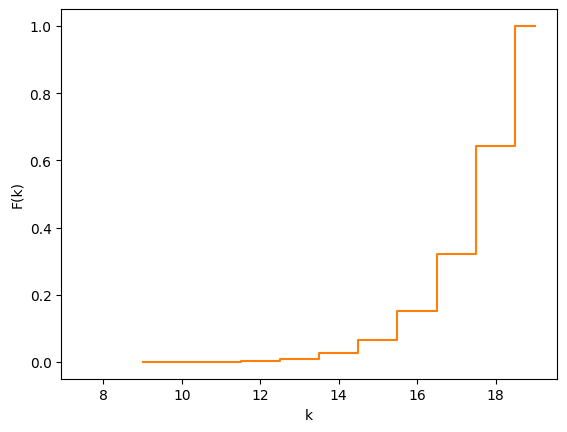

In [ ]:
fig = plt.figure()
ax = fig.add_subplot()
ax.set_xlabel('k')
ax.set_ylabel("F(k)")
plt.step(7.5, 0, where = 'pre')
plt.step(K[1:], F_k[1:], where = 'mid')
plt.step(11.5, 1, where = 'post')

#3.3

Рассчитать математическое ожидание числа извлечённых красных шаров k.

M(x) = x1*p1 + ... + xn*pn

In [ ]:
Mx = 0

print("k\t\tP(k)\t\t\t    k*P(k)")
print("__________________________________________________________")

for i in range(12):
    Mx += P_k[i] * K[i]
    print(K[i],'\t', P_k[i],'\t\t', K[i]*P_k[i])

print("\nM(x) = ", Mx)

k		P(k)			    k*P(k)
__________________________________________________________
8 	 1.6538329231827684e-06 		 1.3230663385462147e-05
9 	 1.3230663385462147e-05 		 0.00011907597046915932
10 	 0.00011907597046915932 		 0.0011907597046915933
11 	 0.0005953798523457966 		 0.006549178375803763
12 	 0.0021830594586012544 		 0.026196713503215053
13 	 0.006549178375803763 		 0.08513931888544893
14 	 0.017027863777089782 		 0.23839009287925694
15 	 0.03973168214654283 		 0.5959752321981424
16 	 0.08513931888544891 		 1.3622291021671826
17 	 0.17027863777089783 		 2.8947368421052633
18 	 0.3216374269005848 		 5.789473684210526
19 	 0.5789473684210527 		 11.0

M(x) =  22.000013230663384


#3.4

Рассчитать дисперсию числа извлечённых красных шаров k.

D(X) = M(X^2)- M(X)^2

M(X)^2 = k^2*P(k)

In [ ]:
Dx = 0
Mx2 = 0

print("k\t\tP(k)\t\t\tk*P(k)\t\t\t\tk^2 * P(k)")
print("_________________________________________________________________________________")

for i in range(12):
    Mx2 += P_k[i] * K[i]**2
    print(K[i],'\t', P_k[i],'\t', K[i]*P_k[i],'\t\t', K[i]**2 * P_k[i])

Dx = Mx2 - Mx**2

print("\nD(X) = ", Dx)

k		P(k)			k*P(k)				k^2 * P(k)
_________________________________________________________________________________
8 	 1.6538329231827684e-06 	 1.3230663385462147e-05 		 0.00010584530708369718
9 	 1.3230663385462147e-05 	 0.00011907597046915932 		 0.0010716837342224339
10 	 0.00011907597046915932 	 0.0011907597046915933 		 0.011907597046915932
11 	 0.0005953798523457966 	 0.006549178375803763 		 0.0720409621338414
12 	 0.0021830594586012544 	 0.026196713503215053 		 0.31436056203858065
13 	 0.006549178375803763 	 0.08513931888544893 		 1.106811145510836
14 	 0.017027863777089782 	 0.23839009287925694 		 3.3374613003095974
15 	 0.03973168214654283 	 0.5959752321981424 		 8.939628482972138
16 	 0.08513931888544891 	 1.3622291021671826 		 21.795665634674922
17 	 0.17027863777089783 	 2.8947368421052633 		 49.21052631578947
18 	 0.3216374269005848 	 5.789473684210526 		 104.21052631578947
19 	 0.5789473684210527 	 11.0 		 209.0

D(X) =  -86.00047630405692


#4.1


Рассматривается извлечение шаров с возвращением из корзины, в которую собраны все ранее рассмотренные шары, а также ещё один шар чёрного цвета. Выполняется серия из n экспериментов, подсчитывается число k извлечений чёрного шара.

---

Построить огибающую графика P(k) n = 100, 1000, 10000, при этом для каждого графика рассчитываются не менее 7 точек с использованием формулы распределения Пуассона.



---



Если испытаний больше, чем вероятности наступления события, то вероятность того, что событие наступит m раз приближенно равна:

Pn(k) ~ a^k/k! * e^-a, где a = n*p

In [ ]:
p = 1/(r1+g1+b1+r2+g2+b2+r3+g3+b3)
q = 1 - p

n =  100 

k	P(k)
______________________________
0 	 0.23474032816471155
1 	 0.3402033741517559
2 	 0.24652418416793903
3 	 0.11909380877678215
4 	 0.043149930716225415
5 	 0.012507226294558091
6 	 0.003021069153274901
7 	 0.0006254801559575365
8 	 0.00011331162245607544
9 	 1.8246638076662712e-05


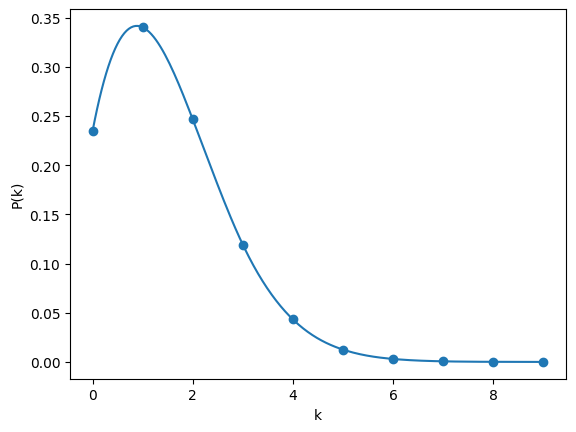

In [ ]:
import numpy as np
from scipy.interpolate import make_interp_spline, BSpline

n = 100

p_k = []
k_ = []

w = 10

for k in range(w):
    k_.append(k)
    p_k.append(((n*p)**k * e**(-n*p))/fact(k))

print("n = ", n, '\n')
print("k\tP(k)\n______________________________")
for i in range(w):
        print(k_[i], '\t', p_k[i])

fig = plt.figure()
ax = fig.add_subplot()
plt.scatter(k_, p_k)
ax.set_xlabel('k')
ax.set_ylabel("P(k)")

x = np.array(k_)
y = np.array(p_k)

xnew = np.linspace (x. min (), x. max (), 200 )

spl = make_interp_spline (x, y, k= 3 )
y_smooth = spl (xnew)

plt.plot (xnew, y_smooth)
plt.show()

n =  1000 

k	P(k)
______________________________
0 	 5.080156294596262e-07
3 	 0.000257738057638008
6 	 0.0065380770298025335
9 	 0.0394886443267369
12 	 0.09106490124004929
15 	 0.10154092180529829
18 	 0.06313241756601273
21 	 0.024082538140680267
24 	 0.00603661148992177
27 	 0.0010470534039012905


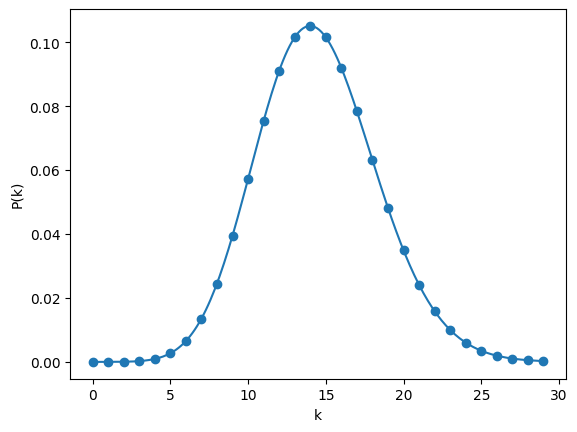

In [ ]:
n = 1000

p_k = []
k_ = []

for k in range(30):
    k_.append(k)
    p_k.append(((n*p)**k * e**(-n*p))/fact(k))

print("n = ", n, '\n')
print("k\tP(k)\n______________________________")
for i in range(0,30,3):
        print(k_[i], '\t', p_k[i])

fig = plt.figure()
ax = fig.add_subplot()
plt.scatter(k_, p_k)
ax.set_xlabel('k')
ax.set_ylabel("P(k)")

x = np.array(k_)
y = np.array(p_k)

xnew = np.linspace (x. min (), x. max (), 200 )

spl = make_interp_spline (x, y, k= 3 )
y_smooth = spl (xnew)

plt.plot (xnew, y_smooth)
plt.show()

In [ ]:
def puasson(k, alpha):
    return (alpha**k * e**(-k))/fact(k)

def puasson3(k, alpha):
    return (round(alpha)**k )/( fact(k) * round(e**alpha) )
def g(M):
    if M - sqrt(M) * 4 < 0:
        return 0
    else:
        return M - sqrt(M) * 4

n =  10000 

k	P(k)
______________________________
97 	 5.349640166809618e-06
99 	 1.159309261051043e-05
101 	 2.4133145756037805e-05
103 	 4.82961535808771e-05
105 	 9.298778654193599e-05
107 	 0.00017237420314267362
109 	 0.00030786337250040033
111 	 0.0005301250947437279
113 	 0.0008806795288390391
115 	 0.0014123788782487259


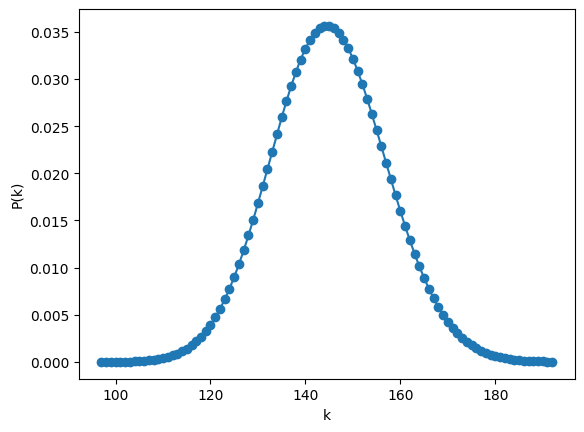

In [ ]:
n = 10000

p_k = []
k_ = []

M = n*p

r = range(round(g(M)), round(M + sqrt(M)*4))

for k in r:
    k_.append(k)
    p_k.append(puasson3(k, M))



print("n = ", n, '\n')
print("k\tP(k)\n______________________________")
for i in range(0,20,2):
        print(k_[i], '\t', p_k[i])

fig = plt.figure()
ax = fig.add_subplot()
plt.scatter(k_, p_k)
ax.set_xlabel('k')
ax.set_ylabel("P(k)")

x = np.array(k_)
y = np.array(p_k)

xnew = np.linspace (x. min (), x. max (), 200 )

spl = make_interp_spline (x, y, k= 3 )
y_smooth = spl (xnew)

plt.plot (xnew, y_smooth)
plt.show()

#4.2

In [ ]:
def puasson(a):
    return 1 - ( (e**round(-a)) + (a/e**round(a)) + (round(a)**2/(2 * e**round(a)) ))

In [ ]:
p_ = [0.7, 0.8, 0.9, 0.95, 0.99]

p_k = []
k_ = []

for P in p_:
    n = 3

    while True:
        M = n*p
        if(int(puasson(M)*100) / 100) >= P:
            break
        else:
            n+=1
    p_k.append(n)
    k_.append(P)



Text(0.5, 0, 'P(k)')

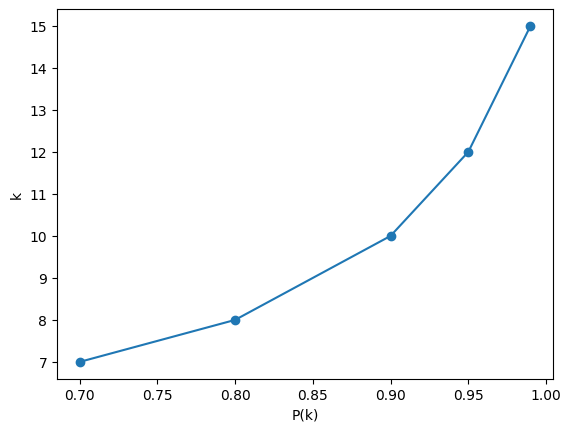

In [ ]:
fig = plt.figure()
ax = fig.add_subplot()
plt.plot(k_, p_k, marker='o')
ax.set_ylabel('k')
ax.set_xlabel("P(k)")